# Reading and Writing Text files

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [19]:
dframe = pd.read_csv('/Users/thiagofreitas/DataAnalysisPython/lec25.csv')

In [20]:
dframe

,q,r,s,t,apple
0,2,3,4,5,pear
1,a,s,d,f,rabbit
2,5,2,5,7,dog


In [22]:
dframe = pd.read_csv('/Users/thiagofreitas/DataAnalysisPython/lec25.csv', header = None)

In [23]:
dframe

,0,1,2,3,4
0,q,r,s,t,apple
1,2,3,4,5,pear
2,a,s,d,f,rabbit
3,5,2,5,7,dog


In [24]:
dframe = pd.read_table('/Users/thiagofreitas/DataAnalysisPython/lec25.csv', sep = ',', header = None)

In [25]:
dframe

,0,1,2,3,4
0,q,r,s,t,apple
1,2,3,4,5,pear
2,a,s,d,f,rabbit
3,5,2,5,7,dog


In [26]:
pd.read_csv('/Users/thiagofreitas/DataAnalysisPython/lec25.csv', header = None, nrows=2)

,0,1,2,3,4
0,q,r,s,t,apple
1,2,3,4,5,pear


In [27]:
dframe

,0,1,2,3,4
0,q,r,s,t,apple
1,2,3,4,5,pear
2,a,s,d,f,rabbit
3,5,2,5,7,dog


In [28]:
dframe.to_csv('mytextdata_out.csv')

In [29]:
import sys

In [30]:
dframe.to_csv(sys.stdout)

,0,1,2,3,4
0,q, r, s, t, apple
1,2, 3, 4, 5, pear
2,a, s, d, f, rabbit
3,5, 2, 5, 7, dog


In [31]:
dframe.to_csv(sys.stdout, sep = '_')

_0_1_2_3_4
0_q_ r_ s_ t_ apple
1_2_ 3_ 4_ 5_ pear
2_a_ s_ d_ f_ rabbit
3_5_ 2_ 5_ 7_ dog


In [32]:
dframe.to_csv(sys.stdout, sep= '?')

?0?1?2?3?4
0?q? r? s? t? apple
1?2? 3? 4? 5? pear
2?a? s? d? f? rabbit
3?5? 2? 5? 7? dog


In [33]:
dframe.to_csv(sys.stdout,columns= [0,1,2])

,0,1,2
0,q, r, s
1,2, 3, 4
2,a, s, d
3,5, 2, 5


# JSON with Python

In [34]:
url = 'http://docs.python.org/2/library/csv.html'

In [35]:
json_obj = """
{   "zoo_animal": "Lion",
    "food": ["Meat", "Veggies", "Honey"],
    "fur": "Golden",
    "clothes": null,
    "diet": [{"zoo_animal": "Gazelle", "food":"grass", "fur": "Brown"}]
}
"""

In [36]:
import json

In [38]:
data = json.loads(json_obj)

In [39]:
data

{'zoo_animal': 'Lion',
 'food': ['Meat', 'Veggies', 'Honey'],
 'fur': 'Golden',
 'clothes': None,
 'diet': [{'zoo_animal': 'Gazelle', 'food': 'grass', 'fur': 'Brown'}]}

In [40]:
json.dumps(data)

'{"zoo_animal": "Lion", "food": ["Meat", "Veggies", "Honey"], "fur": "Golden", "clothes": null, "diet": [{"zoo_animal": "Gazelle", "food": "grass", "fur": "Brown"}]}'

In [41]:
dframe = DataFrame(data['diet'])
dframe

,zoo_animal,food,fur
0,Gazelle,grass,Brown


# HTML with Python

In [42]:
from pandas import read_html

In [44]:
# pip install beautiful-soup
# pip install html5lib

In [45]:
url = 'http://www.fdic.gov/bank/individual/failed/banklist.html'

In [47]:
dframe_list = pd.io.html.read_html(url)
# This is gonna grab data from html and put it into a list of dataframe objects

In [49]:
dframe = dframe_list[0]
dframe

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
1,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
2,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"
3,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019"
4,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017"
...,...,...,...,...,...,...
554,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001"
555,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001"
556,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001"
557,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000"


In [50]:
dframe.columns.values

array(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date'], dtype=object)

# Excel files with Python

In [51]:
# To work with excel we have to install 2 modules:
# pip install xLrd
# pip install openpyxL

In [52]:
xlsfile = pd.ExcelFile('/Users/thiagofreitas/DataAnalysisPython/lec28.xlsx')

In [54]:
dframe = xlsfile.parse('Sheet1')
dframe

,This is a test,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,23,6678,456
1,NaN,234,678,456
2,NaN,234,7,345
3,NaN,34,56,234
4,NaN,5,456,4365


# Merging

In [55]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [56]:
dframe1 = DataFrame({'key': ['X','Z','Y','Z','X','X'], 'data_set_1': np.arange(6)})
dframe1

,key,data_set_1
0,X,0
1,Z,1
2,Y,2
3,Z,3
4,X,4
5,X,5


In [57]:
dframe2 = DataFrame({'key': ['Q','Y','Z'], 'data_set_2': [1,2,3]})
dframe2

,key,data_set_2
0,Q,1
1,Y,2
2,Z,3


In [58]:
pd.merge(dframe1,dframe2)

,key,data_set_1,data_set_2
0,Z,1,3
1,Z,3,3
2,Y,2,2


In [59]:
pd.merge(dframe1,dframe2,on='key')

,key,data_set_1,data_set_2
0,Z,1,3
1,Z,3,3
2,Y,2,2


In [60]:
pd.merge(dframe1,dframe2,on='key',how='left')

,key,data_set_1,data_set_2
0,X,0,NaN
1,Z,1,3.0
2,Y,2,2.0
3,Z,3,3.0
4,X,4,NaN
5,X,5,NaN


In [62]:
pd.merge(dframe1,dframe2,on='key', how='right')

,key,data_set_1,data_set_2
0,Z,1.0,3
1,Z,3.0,3
2,Y,2.0,2
3,Q,NaN,1


In [63]:
pd.merge(dframe1,dframe2,on='key',how='outer')

,key,data_set_1,data_set_2
0,X,0.0,NaN
1,X,4.0,NaN
2,X,5.0,NaN
3,Z,1.0,3.0
4,Z,3.0,3.0
5,Y,2.0,2.0
6,Q,NaN,1.0


In [64]:
dframe3 = DataFrame({'key': ['X','X','X','Y','Z','Z'], 'data_set_3': range(6)})

In [65]:
dframe4 = DataFrame({'key': ['Y','Y','X','X','Z'], 'data_set_4': range(5)})

In [66]:
dframe3

,key,data_set_3
0,X,0
1,X,1
2,X,2
3,Y,3
4,Z,4
5,Z,5


In [67]:
dframe4

,key,data_set_4
0,Y,0
1,Y,1
2,X,2
3,X,3
4,Z,4


In [68]:
pd.merge(dframe3,dframe4)

,key,data_set_3,data_set_4
0,X,0,2
1,X,0,3
2,X,1,2
3,X,1,3
4,X,2,2
5,X,2,3
6,Y,3,0
7,Y,3,1
8,Z,4,4
9,Z,5,4


# Merging on Index

In [69]:
df_left = DataFrame({'key1': ['SF','SF','LA'], 
                     'key2': ['one','two','one'], 
                     'left_data':[10,20,30] })

In [70]:
df_right = DataFrame({'key1': ['SF','SF','LA','LA'],
                      'key2': ['one','one','one','two'],
                      'right_data': [40,50,60,70]})

In [71]:
df_left

,key1,key2,left_data
0,SF,one,10
1,SF,two,20
2,LA,one,30


In [72]:
df_right

,key1,key2,right_data
0,SF,one,40
1,SF,one,50
2,LA,one,60
3,LA,two,70


In [73]:
pd.merge(df_left,df_right, on=['key1','key2'], how='outer')

,key1,key2,left_data,right_data
0,SF,one,10.0,40.0
1,SF,one,10.0,50.0
2,SF,two,20.0,NaN
3,LA,one,30.0,60.0
4,LA,two,NaN,70.0


In [74]:
pd.merge(df_left,df_right,on='key1')

,key1,key2_x,left_data,key2_y,right_data
0,SF,one,10,one,40
1,SF,one,10,one,50
2,SF,two,20,one,40
3,SF,two,20,one,50
4,LA,one,30,one,60
5,LA,one,30,two,70


In [75]:
pd.merge(df_left,df_right, on='key1', suffixes=('_lefty', '_righty'))

,key1,key2_lefty,left_data,key2_righty,right_data
0,SF,one,10,one,40
1,SF,one,10,one,50
2,SF,two,20,one,40
3,SF,two,20,one,50
4,LA,one,30,one,60
5,LA,one,30,two,70


In [77]:
url = 'http://pandas-docs.github.io/pandas-docs-travis/reference/api/pandas.DataFrame.merge.html?highlight=merge#pandas.DataFrame.merge'

In [78]:
df_left = DataFrame({'key': ['X','Y','Z','X','Y'],
                     'data': range(5)})

In [79]:
df_left

,key,data
0,X,0
1,Y,1
2,Z,2
3,X,3
4,Y,4


In [80]:
df_right = DataFrame({'group_data': [10,20]}, index=['X','Y'])

In [81]:
df_right

,group_data
X,10
Y,20


In [82]:
pd.merge(df_left,df_right,left_on='key',right_index=True)

,key,data,group_data
0,X,0,10
3,X,3,10
1,Y,1,20
4,Y,4,20


In [84]:
df_left_hr = DataFrame({'key1': ['SF','SF','SF','LA','LA'],
                        'key2': [10,20,20,30,30],
                        'data_set': np.arange(5.)})

In [85]:
df_left_hr

,key1,key2,data_set
0,SF,10,0.0
1,SF,20,1.0
2,SF,20,2.0
3,LA,30,3.0
4,LA,30,4.0


In [86]:
df_right_hr = DataFrame(np.arange(10).reshape(5,2),
                       index = [['LA','LA','SF','SF','SF'],
                               [20,10,10,10,20]],
                       columns = ['col_1','col_2'])

In [87]:
df_right_hr

col_1  col_2
LA 20      0      1
   10      2      3
SF 10      4      5
   10      6      7
   20      8      9

In [88]:
pd.merge(df_left_hr,df_right_hr, left_on=['key1','key2'],right_index=True)

,key1,key2,data_set,col_1,col_2
0,SF,10,0.0,4,5
0,SF,10,0.0,6,7
1,SF,20,1.0,8,9
2,SF,20,2.0,8,9


In [89]:
df_left.join(df_right)

,key,data,group_data
0,X,0,NaN
1,Y,1,NaN
2,Z,2,NaN
3,X,3,NaN
4,Y,4,NaN


# Concatenate

In [90]:
arr1 = np.arange(9).reshape(3,3)
arr1

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [91]:
np.concatenate([arr1,arr1], axis=1)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

In [92]:
np.concatenate([arr1,arr1], axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [93]:
ser1 = Series([0,1,2], index=['T','U','V'])

ser2 = Series([3,4], index=['X','Y'])

In [94]:
ser1

T    0
U    1
V    2
dtype: int64

In [95]:
ser2

X    3
Y    4
dtype: int64

In [96]:
pd.concat([ser1,ser2])

T    0
U    1
V    2
X    3
Y    4
dtype: int64

In [98]:
pd.concat([ser1,ser2], axis=1, sort=True)

,0,1
T,0.0,NaN
U,1.0,NaN
V,2.0,NaN
X,NaN,3.0
Y,NaN,4.0


In [99]:
pd.concat([ser1,ser2], keys=['cat1','cat2'])

cat1  T    0
      U    1
      V    2
cat2  X    3
      Y    4
dtype: int64

In [100]:
dframe1 = DataFrame(np.random.randn(4,3), columns=['X','Y','Z'])

dframe2 = DataFrame(np.random.randn(3,3), columns=['Y','Q','X'])

In [101]:
dframe1

,X,Y,Z
0,-0.287381,2.103596,0.998812
1,0.806780,-0.959410,-0.819916
2,-0.703568,-1.378734,0.506242
3,0.583857,-0.320284,1.115112


In [102]:
dframe2

,Y,Q,X
0,1.847793,0.517032,1.434691
1,-0.216100,1.092955,-1.173232
2,1.171822,-1.465426,-0.750470


In [104]:
pd.concat([dframe1,dframe2], sort=True)

,Q,X,Y,Z
0,NaN,-0.287381,2.103596,0.998812
1,NaN,0.806780,-0.959410,-0.819916
2,NaN,-0.703568,-1.378734,0.506242
3,NaN,0.583857,-0.320284,1.115112
0,0.517032,1.434691,1.847793,NaN
1,1.092955,-1.173232,-0.216100,NaN
2,-1.465426,-0.750470,1.171822,NaN


In [105]:
pd.concat([dframe1,dframe2], ignore_index=True ,sort=True)

,Q,X,Y,Z
0,NaN,-0.287381,2.103596,0.998812
1,NaN,0.806780,-0.959410,-0.819916
2,NaN,-0.703568,-1.378734,0.506242
3,NaN,0.583857,-0.320284,1.115112
4,0.517032,1.434691,1.847793,NaN
5,1.092955,-1.173232,-0.216100,NaN
6,-1.465426,-0.750470,1.171822,NaN


In [106]:
url = 'http://pandas-docs.github.io/pandas-docs-travis/reference/api/pandas.concat.html?highlight=pandas%20concat#pandas.concat'

# Combining DataFrames

In [107]:
ser1 = Series([2,np.nan,4,np.nan,6,np.nan],
             index=['Q','R','S','T','U','V'])
ser1

Q    2.0
R    NaN
S    4.0
T    NaN
U    6.0
V    NaN
dtype: float64

In [108]:
ser2 = Series(np.arange(len(ser1)), dtype=np.float64,
             index=['Q','R','S','T','U','V'])
ser2

Q    0.0
R    1.0
S    2.0
T    3.0
U    4.0
V    5.0
dtype: float64

In [109]:
Series(np.where(pd.isnull(ser1),ser2,ser1), index=ser1.index)

Q    2.0
R    1.0
S    4.0
T    3.0
U    6.0
V    5.0
dtype: float64

In [111]:
# This is the shortcut method to do the same thing as above
ser1.combine_first(ser2)

Q    2.0
R    1.0
S    4.0
T    3.0
U    6.0
V    5.0
dtype: float64

In [112]:
nan = np.nan
dframe_odds = DataFrame({'X': [1.,nan,3.,nan],
                         'Y': [nan,5.,nan,7.],
                         'Z': [nan,9.,nan,11.]})

In [114]:
dframe_evens = DataFrame({'X': [2.,4.,nan,6.,8.],
                          'Y': [nan,10.,12.,14.,16.]})

In [115]:
dframe_odds

,X,Y,Z
0,1.0,NaN,NaN
1,NaN,5.0,9.0
2,3.0,NaN,NaN
3,NaN,7.0,11.0


In [116]:
dframe_evens

,X,Y
0,2.0,NaN
1,4.0,10.0
2,NaN,12.0
3,6.0,14.0
4,8.0,16.0


In [117]:
dframe_odds.combine_first(dframe_evens)

,X,Y,Z
0,1.0,NaN,NaN
1,4.0,5.0,9.0
2,3.0,12.0,NaN
3,6.0,7.0,11.0
4,8.0,16.0,NaN


# Reshaping

In [118]:
dframe1 = DataFrame(np.arange(8).reshape(2,4),
                   index=pd.Index(['LA','SF'], name='city'),
                   columns=pd.Index(['A','B','C','D'],name='letter'))
# The reason to use pd.Index instead of just passing the list 
# is to be able to pass the list and name it at the same time.

In [119]:
dframe1

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [120]:
dframe_st = dframe1.stack()
dframe_st

city  letter
LA    A         0
      B         1
      C         2
      D         3
SF    A         4
      B         5
      C         6
      D         7
dtype: int64

In [121]:
dframe_st.unstack()

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [122]:
dframe_st.unstack('letter')

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [123]:
dframe_st.unstack('city')

city,LA,SF
letter,,
A,0,4
B,1,5
C,2,6
D,3,7


In [124]:
ser1 = Series([0,1,2], index=['Q','X','Y'])

ser2 = Series([4,5,6], index=['X','Y','Z'])

In [125]:
dframe = pd.concat([ser1,ser2], keys=['Alpha','Beta'])
dframe

Alpha  Q    0
       X    1
       Y    2
Beta   X    4
       Y    5
       Z    6
dtype: int64

In [126]:
# This is not a dataframe yet, but just a bunch of series stacked together.
# In order to turn it into a dataframe, we need to unstack

dframe.unstack()

,Q,X,Y,Z
Alpha,0.0,1.0,2.0,NaN
Beta,NaN,4.0,5.0,6.0


In [127]:
# To get rid of the null values you can unstack the dataframe and then stack it again.
dframe.unstack().stack()

Alpha  Q    0.0
       X    1.0
       Y    2.0
Beta   X    4.0
       Y    5.0
       Z    6.0
dtype: float64

In [128]:
dframe = dframe.unstack()

In [129]:
dframe

,Q,X,Y,Z
Alpha,0.0,1.0,2.0,NaN
Beta,NaN,4.0,5.0,6.0


In [130]:
dframe.stack()

Alpha  Q    0.0
       X    1.0
       Y    2.0
Beta   X    4.0
       Y    5.0
       Z    6.0
dtype: float64

In [131]:
# Do the below to keep the null values if you want.
dframe.stack(dropna=False)

Alpha  Q    0.0
       X    1.0
       Y    2.0
       Z    NaN
Beta   Q    NaN
       X    4.0
       Y    5.0
       Z    6.0
dtype: float64

# Pivoting

In [132]:
# import pandas testing utility
import pandas.util.testing as tm; tm.N = 3

# Create a unpivoted function
def unpivot(frame):
    N, K = frame.shape
    
    data = {'value': frame.values.ravel('F'),
            'variable': np.asarray(frame.columns).repeat(N),
            'date': np.tile(np.asarray(frame.index), K)}
    
    # Return the DataFrame
    return DataFrame(data, columns=['date', 'variable', 'value'])

# Set the DataFrame we'll be using
dframe = unpivot(tm.makeTimeDataFrame())

In [133]:
dframe

,date,variable,value
0,2000-01-03,A,1.799041
1,2000-01-04,A,-1.108094
2,2000-01-05,A,-1.289894
3,2000-01-03,B,0.440447
4,2000-01-04,B,0.122522
5,2000-01-05,B,1.001935
6,2000-01-03,C,-1.909015
7,2000-01-04,C,0.742920
8,2000-01-05,C,0.824320
9,2000-01-03,D,2.034011


In [134]:
# dframe.pivot(rows, columns, fill value) -> This is the pivot function format.

dframe_piv = dframe.pivot('date', 'variable', 'value')

In [135]:
dframe_piv

variable,A,B,C,D
date,,,,
2000-01-03,1.799041,0.440447,-1.909015,2.034011
2000-01-04,-1.108094,0.122522,0.742920,1.746432
2000-01-05,-1.289894,1.001935,0.824320,1.804134


# Duplicates in DataFrames

In [136]:
dframe = DataFrame({'key1': ['A']*2 + ['B']*3,
                    'key2': [2,2,2,3,3]})
dframe

,key1,key2
0,A,2
1,A,2
2,B,2
3,B,3
4,B,3


In [137]:
# To see the duplicates
dframe.duplicated()

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [138]:
# To drop duplicates
dframe.drop_duplicates(['key1'])


,key1,key2
0,A,2
2,B,2


In [139]:
dframe

,key1,key2
0,A,2
1,A,2
2,B,2
3,B,3
4,B,3


In [142]:
dframe.drop_duplicates(['key1'],keep='last')

,key1,key2
1,A,2
4,B,3


# Mapping

In [143]:
dframe = DataFrame({'city': ['Alma','Brian Head','Fox Park'],
                    'altitude': [3158, 3000, 2762]})
dframe

,city,altitude
0,Alma,3158
1,Brian Head,3000
2,Fox Park,2762


In [147]:
state_map = {'Alma': 'Colorado', 'Brian Head': 'Utah', 'Fox Park': 'Wyoming'}

In [148]:
dframe['state'] = dframe['city'].map(state_map)

In [149]:
dframe

,city,altitude,state
0,Alma,3158,Colorado
1,Brian Head,3000,Utah
2,Fox Park,2762,Wyoming


# Replace

In [150]:
ser1 = Series([1,2,3,4,1,2,3,4])
ser1

0    1
1    2
2    3
3    4
4    1
5    2
6    3
7    4
dtype: int64

In [151]:
ser1.replace(1,np.nan)

0    NaN
1    2.0
2    3.0
3    4.0
4    NaN
5    2.0
6    3.0
7    4.0
dtype: float64

In [152]:
ser1.replace([1,4], [100,400])

0    100
1      2
2      3
3    400
4    100
5      2
6      3
7    400
dtype: int64

In [153]:
ser1.replace({4:np.nan})

0    1.0
1    2.0
2    3.0
3    NaN
4    1.0
5    2.0
6    3.0
7    NaN
dtype: float64

# Rename Index

In [154]:
dframe = DataFrame(np.arange(12).reshape(3,4),
                  index=['NY','LA','SF'],
                  columns=['A','B','C','D'])
dframe

,A,B,C,D
NY,0,1,2,3
LA,4,5,6,7
SF,8,9,10,11


In [155]:
dframe.index.map(str.lower)

Index(['ny', 'la', 'sf'], dtype='object')

In [158]:
dframe.index = dframe.index.map(str.lower)
dframe

,A,B,C,D
ny,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


In [159]:
dframe.rename(index=str.title,columns=str.lower)

,a,b,c,d
Ny,0,1,2,3
La,4,5,6,7
Sf,8,9,10,11


In [160]:
dframe.rename(index={'ny': 'NEW YORK'},
             columns={'A': 'ALPHA'})

,ALPHA,B,C,D
NEW YORK,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


In [161]:
dframe.rename(index={'ny': 'NEW YORK'}, inplace=True)

In [162]:
dframe

,A,B,C,D
NEW YORK,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


# Binning


In [165]:
years = [1990,1991,1992,2008,2012,2015,1987,1969,2013,2008,1999]

In [166]:
decade_bins = [1960,1970,1980,1990,2000,2010,2020]

In [167]:
decade_cat = pd.cut(years,decade_bins)

In [168]:
decade_cat

[(1980, 1990], (1990, 2000], (1990, 2000], (2000, 2010], (2010, 2020], ..., (1980, 1990], (1960, 1970], (2010, 2020], (2000, 2010], (1990, 2000]]
Length: 11
Categories (6, interval[int64]): [(1960, 1970] < (1970, 1980] < (1980, 1990] < (1990, 2000] < (2000, 2010] < (2010, 2020]]

In [169]:
decade_cat.categories

IntervalIndex([(1960, 1970], (1970, 1980], (1980, 1990], (1990, 2000], (2000, 2010], (2010, 2020]],
              closed='right',
              dtype='interval[int64]')

In [170]:
pd.value_counts(decade_cat)

(2010, 2020]    3
(1990, 2000]    3
(2000, 2010]    2
(1980, 1990]    2
(1960, 1970]    1
(1970, 1980]    0
dtype: int64

In [171]:
pd.cut(years,2,precision=1)

[(1969.0, 1992.0], (1969.0, 1992.0], (1969.0, 1992.0], (1992.0, 2015.0], (1992.0, 2015.0], ..., (1969.0, 1992.0], (1969.0, 1992.0], (1992.0, 2015.0], (1992.0, 2015.0], (1992.0, 2015.0]]
Length: 11
Categories (2, interval[float64]): [(1969.0, 1992.0] < (1992.0, 2015.0]]

# Outliers 

In [172]:
np.random.seed(12345)

In [173]:
dframe = DataFrame(np.random.randn(1000,4))
dframe

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570
...,...,...,...,...
995,1.089085,0.251232,-1.451985,1.653126
996,-0.478509,-0.010663,-1.060881,-1.502870
997,-1.946267,1.013592,0.037333,0.133304
998,-1.293122,-0.322542,-0.782960,-0.303340


In [174]:
dframe.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [175]:
col = dframe[0]

In [176]:
col.head()

0   -0.204708
1    1.965781
2    0.769023
3    0.274992
4   -2.001637
Name: 0, dtype: float64

In [177]:
col[np.abs(col)>3]

523   -3.428254
900    3.366626
Name: 0, dtype: float64

In [178]:
dframe[(np.abs(dframe)>3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [179]:
dframe[np.abs(dframe)>3] = np.sign(dframe)*3

In [180]:
dframe.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


# Permutations

In [182]:
# We are gonna learn how to randomly reorder either a Series or rows in a DataFrame

In [183]:
dframe = DataFrame(np.arange(16).reshape(4,4))

In [184]:
blender = np.random.permutation(4)

In [186]:
blender

array([1, 3, 2, 0])

In [187]:
dframe

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [189]:
# This is gonna permute the rows, reordering the index like the blender.
dframe.take(blender)

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
2,8,9,10,11
0,0,1,2,3


In [190]:
box = np.array([1,2,3])

In [191]:
shaker = np.random.randint(0,len(box), size=10)

In [192]:
shaker

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 2])

In [193]:
hand_grabs = box.take(shaker)
hand_grabs

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 3])

# GroupBy on DataFrames

In [202]:
dframe = DataFrame({'k1': ['X', 'X','Y','Y','Z'],
                    'K2': ['alpha','beta','alpha','beta','alpha'],
                    'dataset1': np.random.randn(5),
                    'dataset2': np.random.randn(5)})
dframe

,k1,K2,dataset1,dataset2
0,X,alpha,0.566194,1.401972
1,X,beta,-0.417365,-1.917985
2,Y,alpha,-1.122283,-0.573498
3,Y,beta,0.282891,0.036820
4,Z,alpha,-1.695303,0.811018


In [195]:
group1 = dframe['dataset1'].groupby(dframe['k1'])

In [196]:
group1

In [197]:
group1.mean()

k1
X   -0.836786
Y    0.484992
Z    1.622469
Name: dataset1, dtype: float64

In [198]:
cities = np.array(['NY','LA','LA','NY','NY'])

month = np.array(['JAN','FEB','JAN','FEB','JAN'])

In [201]:
dframe['dataset1'].groupby([cities,month]).mean()

LA  FEB   -2.453088
    JAN    0.689468
NY  FEB    0.280517
    JAN    1.200992
Name: dataset1, dtype: float64

In [203]:
dframe

,k1,K2,dataset1,dataset2
0,X,alpha,0.566194,1.401972
1,X,beta,-0.417365,-1.917985
2,Y,alpha,-1.122283,-0.573498
3,Y,beta,0.282891,0.036820
4,Z,alpha,-1.695303,0.811018


In [204]:
dframe.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,0.074415,-0.258007
Y,-0.419696,-0.268339
Z,-1.695303,0.811018


In [206]:
dframe.groupby(['k1','k2']).mean()

KeyError: 'k2'

In [207]:
dframe.groupby(['k1']).size()

k1
X    2
Y    2
Z    1
dtype: int64

In [208]:
dframe

,k1,K2,dataset1,dataset2
0,X,alpha,0.566194,1.401972
1,X,beta,-0.417365,-1.917985
2,Y,alpha,-1.122283,-0.573498
3,Y,beta,0.282891,0.036820
4,Z,alpha,-1.695303,0.811018


In [210]:
for name,group in dframe.groupby('k1'):
    print("This is the %s group" %name)
    print(group)
    print('\n')

This is the X group
  k1     K2  dataset1  dataset2
0  X  alpha  0.566194  1.401972
1  X   beta -0.417365 -1.917985


This is the Y group
  k1     K2  dataset1  dataset2
2  Y  alpha -1.122283 -0.573498
3  Y   beta  0.282891  0.036820


This is the Z group
  k1     K2  dataset1  dataset2
4  Z  alpha -1.695303  0.811018




In [216]:
for (k1,k2), group in dframe.groupby(['k1','k2']):
    print("key1 = %s key2 %s" %(k1,k2))
    print(group)
    print('\n')

KeyError: 'k2'

In [217]:
group_dict = dict(list(dframe.groupby('k1')))

In [218]:
group_dict['X']

,k1,K2,dataset1,dataset2
0,X,alpha,0.566194,1.401972
1,X,beta,-0.417365,-1.917985


In [223]:
group_dict_axis1 = dict(list(dframe.groupby(dframe.dtypes,axis=1)))

In [224]:
group_dict_axis1

{dtype('float64'):    dataset1  dataset2
 0  0.566194  1.401972
 1 -0.417365 -1.917985
 2 -1.122283 -0.573498
 3  0.282891  0.036820
 4 -1.695303  0.811018, dtype('O'):   k1     K2
 0  X  alpha
 1  X   beta
 2  Y  alpha
 3  Y   beta
 4  Z  alpha}

In [225]:
dataset2_group = dframe.groupby(['k1','k2'])[['dataset2']]

dataset2_group.mean()

KeyError: 'k2'

# GroupBY on Dict and Series

In [226]:
animals = DataFrame(np.arange(16).reshape(4,4),
                   columns=['W','X','Y','Z'],
                   index=['Dog','Cat','Bird','Mouse'])
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,4,5,6,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [229]:
animals.loc[1:2,['W','Y']] = np.nan

In [230]:
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [231]:
behavior_map = {'W': 'good', 'X': 'bad', 'Y': 'good', 'Z': 'bad'}

In [232]:
animals_col = animals.groupby(behavior_map,axis=1)

animals_col.sum()

,bad,good
Dog,4.0,2.0
Cat,12.0,0.0
Bird,20.0,18.0
Mouse,28.0,26.0


In [233]:
behav_series = Series(behavior_map)

behav_series

W    good
X     bad
Y    good
Z     bad
dtype: object

In [234]:
animals.groupby(behav_series, axis=1).count()

,bad,good
Dog,2,2
Cat,2,0
Bird,2,2
Mouse,2,2


In [235]:
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [236]:
animals.groupby(len).sum()

,W,X,Y,Z
3,0.0,6,2.0,10
4,8.0,9,10.0,11
5,12.0,13,14.0,15


In [237]:
keys = ['A','B','A','B']

In [238]:
animals.groupby([len,keys]).max()

W   X     Y   Z
3 A   0.0   1   2.0   3
  B   NaN   5   NaN   7
4 A   8.0   9  10.0  11
5 B  12.0  13  14.0  15

In [239]:
hier_col = pd.MultiIndex.from_arrays([['NY', 'NY','NY','SF','SF'], [1,2,3,1,2]], names=['City', 'sub_value'])

In [240]:
dframe_hr = DataFrame(np.arange(25).reshape(5,5), columns=hier_col)

In [241]:
dframe_hr = dframe_hr * 100

In [242]:
dframe_hr

City         NY                SF      
sub_value     1     2     3     1     2
0             0   100   200   300   400
1           500   600   700   800   900
2          1000  1100  1200  1300  1400
3          1500  1600  1700  1800  1900
4          2000  2100  2200  2300  2400

# Aggregation

In [243]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

In [249]:
pwd

'/Users/thiagofreitas'

In [251]:
dframe_wine = pd.read_csv('/Users/thiagofreitas/Downloads/winequality-red.csv', sep=';')

In [252]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [253]:
dframe_wine['alcohol'].mean()

10.422983114446502

In [254]:
dframe_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [255]:
def max_to_min(arr):
    return arr.max() - arr.min()

In [256]:
wino = dframe_wine.groupby('quality')

In [260]:
wino.describe()

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5   
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9   
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3   
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6   
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   10.0  0.884500  ...     0.615  0.86    10.0   9.955000   
4                   53.0  0.693962  ...     0.600  2.00    53.0  10.265094   
5                  681.0  0.577041  ...     0.660  1.98   681.0   9.899706   
6                  638.0  0.497484  ...     0.750  1.95   638.0  10.629519   
7                  199.0  0.403920  ...     0.830  1.36   199.0  11.465913   
8                   18.0  0.423333  ...     0.820  1.10    18.0  12.094444   

                                                      
              std  min     25%     50%     75%   max  
quality                                               
3        0.818009  8.4   9.725   9.925  10.575  11.0  
4        0.934776  9.0   9.600  10.000  11.000  13.1  
5        0.736521  8.5   9.400   9.700  10.200  14.9  
6        1.049639  8.4   9.800  10.500  11.300  14.0  
7        0.961933  9.2  10.800  11.500  12.100  14.0  
8        1.224011  9.8  11.325  12.150  12.875  14.0  

[6 rows x 88 columns]

In [258]:
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [261]:
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [262]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [263]:
dframe_wine['qual/alc ratio'] = dframe_wine['quality'] / dframe_wine['alcohol']

In [264]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [265]:
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [266]:
%matplotlib inline

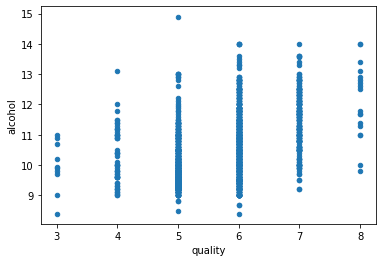

In [267]:
dframe_wine.plot(kind='scatter', x='quality', y='alcohol')

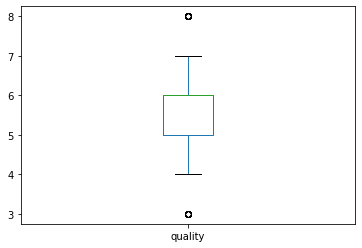

In [270]:
dframe_wine.plot(kind='box', y='quality', x='alcohol')

# Split, Apply, and Combine

In [271]:
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df)) + 1
    return df

In [275]:
dframe_wine.sort_values('alcohol', ascending = False, inplace=True)

In [276]:
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

In [277]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,2
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,0.428571,3


In [278]:
num_of_qual = dframe_wine['quality'].value_counts()

In [279]:
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [280]:
dframe_wine[dframe_wine.alc_content_rank == 1].head(len(num_of_qual))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,0.500000,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,0.305344,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0.272727,1


# Cross Tabulation

In [282]:
from io import StringIO

In [283]:
data="""\
Sample Animal Intelligence
1 Dog Smart
2 Dog Smart
3 Cat Dumb
4 Cat Dumb
5 Dog Dumb
6 Cat Smart"""

In [284]:
dframe = pd.read_table(StringIO(data), sep='\s+')

In [285]:
dframe

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dumb
3,4,Cat,Dumb
4,5,Dog,Dumb
5,6,Cat,Smart


In [287]:
pd.crosstab(dframe.Animal, dframe.Intelligence, margins=True)

Intelligence,Dumb,Smart,All
Animal,,,
Cat,2,1,3
Dog,1,2,3
All,3,3,6
